In [1]:
# import elements from pyvispoly
import matplotlib.pyplot as plt

from pyvispoly import (
    FieldNumber,
    Point,
    Polygon,
    PolygonWithHoles,
    VisibilityPolygonCalculator,
    plot_polygon,
)

In [2]:
# exact number type
a = FieldNumber(100)
b = FieldNumber(200)
c = a + b
assert isinstance(c, FieldNumber)
print("c:", c)
print("float(c):", float(c))
assert float(c) == 300.0

c: 300.000000
float(c): 300.0


In [3]:
# point type
p1 = Point(FieldNumber(0), FieldNumber(0))
assert p1.x() == FieldNumber(0)
assert p1.y() == FieldNumber(0)
p2 = Point(2, 3)
p3 = Point(4.0, 5.0)
print("p1:", p1)
print("p2:", p2)
print("p3:", p3)

p1: (0, 0)
p2: (2, 3)
p3: (4, 5)


In [4]:
# Polygon
poly1 = Polygon([Point(0, 0), Point(1, 0), Point(1, 1), Point(0, 1)])
assert poly1.is_simple()
assert poly1.area() == FieldNumber(1)
assert float(poly1.area()) == 1.0

In [5]:
# The ccw order of the points is important
poly1 = Polygon([Point(0, 0), Point(1, 0), Point(1, 1), Point(0, 1)][::-1])
assert poly1.is_simple()
assert poly1.area() == FieldNumber(-1)
assert float(poly1.area()) == -1.0

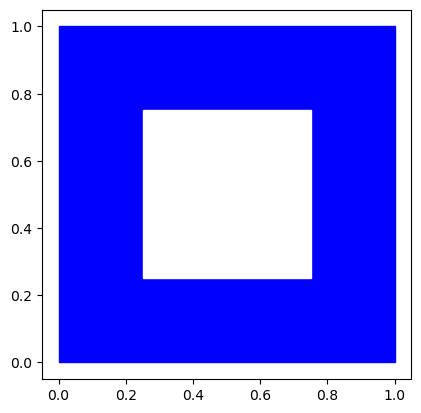

In [6]:
# Polygon with holes
poly2 = PolygonWithHoles(
    [Point(0, 0), Point(1, 0), Point(1, 1), Point(0, 1)],
    [
        [Point(0.25, 0.25), Point(0.75, 0.25), Point(0.75, 0.75), Point(0.25, 0.75)][
            ::-1
        ]
    ],
)
# boundary is counter-clockwise
assert poly2.outer_boundary().area() >= FieldNumber(0)
for hole in poly2.holes():
    # holes are clockwise
    assert hole.area() <= FieldNumber(0)

fig, ax = plt.subplots()
ax.set_aspect("equal")
plot_polygon(poly2, ax=ax)
plt.show()

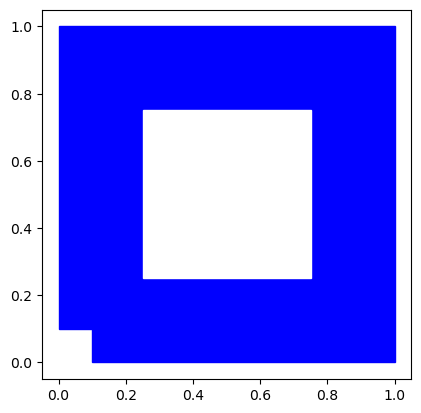

In [7]:
# set operations on polygons
poly3 = PolygonWithHoles([Point(0, 0), Point(0.1, 0), Point(0.1, 0.1), Point(0, 0.1)])
poly4_list = poly2.difference(poly3)
assert len(poly4_list) == 1, "Expect a single polygon"
poly4 = poly4_list[0]
fig, ax = plt.subplots()
ax.set_aspect("equal")
plot_polygon(poly4, ax=ax)
plt.show()

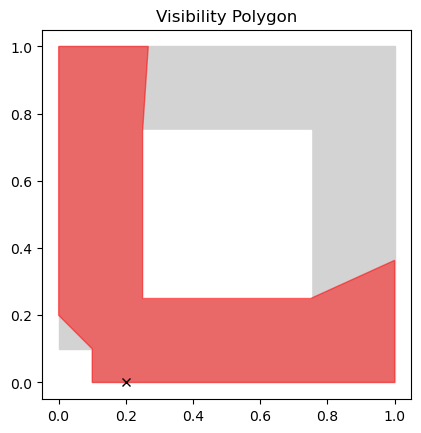

In [8]:
# compute visibility polygon
visp_poly_calc = VisibilityPolygonCalculator(poly4)
vis_poly = visp_poly_calc.compute_visibility_polygon(Point(0.2, 0.0))

fig, ax = plt.subplots()
ax.set_aspect("equal")
plt.title("Visibility Polygon")
plot_polygon(poly4, ax=ax, color="lightgrey")
plot_polygon(vis_poly, ax=ax, color="red", alpha=0.5)
plt.plot([0.2], [0.0], "x", color="black")
plt.savefig("../docs/figures/visibility_polygon.png")
plt.show()

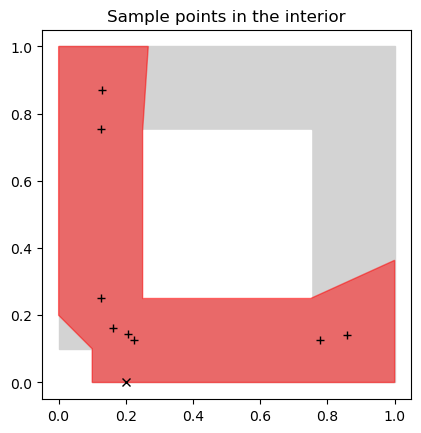

In [9]:
# getting some interior points
fig, ax = plt.subplots()
ax.set_aspect("equal")
plt.title("Sample points in the interior")
plot_polygon(poly4, ax=ax, color="lightgrey")
plot_polygon(vis_poly, ax=ax, color="red", alpha=0.5)
plt.plot([0.2], [0.0], "x", color="black")
interior_points = vis_poly.interior_sample_points()
for p in interior_points:
    assert vis_poly.contains(p), "all points should be inside the visibility polygon"
plt.plot(
    [p.x() for p in interior_points],
    [p.y() for p in interior_points],
    "+",
    color="black",
)
plt.show()